# HAVI Inbound
- Snehal Gawas

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
plt.style.use('seaborn-whitegrid')
%matplotlib inline
loca_path = './'

In [14]:
Inbound_data = pd.read_excel(loca_path+"START HERE_DC Volumes with Case Attributes.xlsx")

In [15]:
Inbound_data.head()

,Supplier Parent Name,Supplier WSI#,DC Receipts Cases Received,Wrin Prefix,Wrin Description,Wrin Temp Zone,WW Case Height,WW Case Length,WW Case Width,WW Weight UOM,WW Pallet TI x HI,WW Gross Weight (LBS),WW Case Dimensions (inches),DC ID
0,MCCAIN FOODS,47883,728707,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,F,13.50,16.38,13.13,LB,9.00 x 6.00,38.0,16.38 x 13.13 x 13.50,7
1,J R SIMPLOT COMPANY,17540,202308,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,F,12.38,16.00,13.00,LB,9.00 x 8.00,38.0,16.00 x 13.00 x 12.38,15
2,SIMPLOT CANADA II LTD,44738,561974,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,F,12.38,16.00,13.00,LB,9.00 x 6.00,38.0,16.00 x 13.00 x 12.38,15
3,CONAGRA FOODS INC,16617,274898,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,F,13.75,15.88,13.00,LB,9.00 x 6.00,38.5,15.88 x 13.00 x 13.75,99
4,CONAGRA FOODS INC,10225,408595,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,F,12.38,16.00,13.00,LB,9.00 x 6.00,38.0,16.00 x 13.00 x 12.38,99


In [16]:
Inbound_data.shape

(660, 14)

## Total Number of Suppliers 

In [17]:
len(Inbound_data['Supplier Parent Name'].unique())

80

## Total number of Distribution Centers

In [18]:
len(Inbound_data['DC ID'].unique())

3

## Total Unique Products 

In [19]:
len(Inbound_data['Wrin Prefix'].unique())

125

## Total Temperature Zones

In [20]:
print(Inbound_data['Wrin Temp Zone'].unique())
len(Inbound_data['Wrin Temp Zone'].unique())

['F' 'R' 'D']


3

## Total case sizes

In [21]:
Inbound_data['case_size']=Inbound_data.apply(lambda row:(row['WW Case Height'],row['WW Case Length'],row['WW Case Width']),axis=1)

In [22]:
len(Inbound_data['case_size'].unique())

239

## Total Pallet arrangments

In [23]:
len(Inbound_data['WW Pallet TI x HI'].unique())

95

## Total weights per case

In [24]:
len(Inbound_data['WW Gross Weight (LBS)'].unique())

215

In [25]:
Inbound_data['WW Gross Weight (LBS)'].min()

1.8999999999999999

In [26]:
Inbound_data['WW Gross Weight (LBS)'].max()

56.170000000000002

## Weight Units

In [27]:
Inbound_data['WW Weight UOM'].unique()


array(['LB', 'KG'], dtype=object)

In [28]:
Inbound_data=Inbound_data[Inbound_data['WW Weight UOM']!='KG']

## Additional Features

In [29]:
# Number of Cases per Pallet
Inbound_data['WW Pallet TI x HI']=Inbound_data['WW Pallet TI x HI'].astype(str)
Inbound_data['Cases_per_Pallet']=Inbound_data['WW Pallet TI x HI'].apply(lambda x: int(float(x.split('x')[0])*float(x.split('x')[1])))
# Maximum hight in terms of layres
Inbound_data['Layer_count']=Inbound_data['WW Pallet TI x HI'].apply(lambda x: int(float(x.split('x')[1])))
# Maximum hight in terms of layres
Inbound_data['Cases_Per_Layer']=Inbound_data['WW Pallet TI x HI'].apply(lambda x: int(float(x.split('x')[0])))

# Weight per pallet
Inbound_data['Weight_per_Pallet']=Inbound_data.apply(lambda row: row['Cases_per_Pallet']*row['WW Gross Weight (LBS)'],axis=1)
# Assuimng pallet is always arranged on base (length-Width wise)
Inbound_data['Height_per_Pallet']=Inbound_data.apply(lambda row: row['WW Case Height']*row['Layer_count'],axis=1)


## Check for Exceptions

### Case

In [30]:
# Exceptions for max weight per case
Max_Weight_Per_Case=40
set(Inbound_data[Inbound_data['WW Gross Weight (LBS)']>Max_Weight_Per_Case]['Wrin Prefix'])

{'00013-CHEESE SLICES',
 '00019-COCA COLA',
 '00042-DIET COKE SYRUP',
 '00055-BIG MAC SAUCE',
 '00063-SLICED DILL PICKLES',
 '00168-SPRITE DRINK SYRUP',
 '00407-CHICKEN NUGGETS',
 '00486-DR PEPPER SYRUP',
 '00821-21/22 OZ COLD CUPS',
 '01637-VALUE MCCHICKEN PATTY',
 '01668-HOT/SPICY CHICKEN',
 '03210-BAKED APPLE PIES',
 '03952-LIQUID EGGS',
 '04002-BULK LITE MAYO',
 '05255-HOMOGENIZED WHOLE MILK',
 '06294-VANILLA ICE CREAM MIX',
 '07533-MOUNTAIN BLAST POWERADE',
 '08551-HI C ORANGE LAVABURST',
 '10451-30 OZ PAPER COLD CUP',
 '10726-INVERT LIQUID SUGAR',
 '11671-CRISPY CHICKEN BREAST FILET'}

In [31]:
temp=Inbound_data[Inbound_data['WW Gross Weight (LBS)']>Max_Weight_Per_Case]
Max_Weight_Per_Pallet=2800
set(temp[temp['Weight_per_Pallet']>Max_Weight_Per_Pallet]['Wrin Prefix'])

{'10726-INVERT LIQUID SUGAR'}

In [32]:
#Exceptions for max height of a case
Max_Height_Per_Case=26.5
set(Inbound_data[Inbound_data['WW Case Height']>Max_Height_Per_Case]['Wrin Prefix'])

set()

### Pallet

In [33]:
# Exceptions for max weight per Pallet
Max_Weight_Per_Pallet=2800
print("Items exceeding Max_Weight_Per_Pallet Limit:",set(Inbound_data[Inbound_data['Weight_per_Pallet']>Max_Weight_Per_Pallet]['Wrin Prefix']))
print("Min Weight:",Inbound_data[Inbound_data['Weight_per_Pallet']>Max_Weight_Per_Pallet]['Weight_per_Pallet'].min())
print("Max Weight:",Inbound_data[Inbound_data['Weight_per_Pallet']>Max_Weight_Per_Pallet]['Weight_per_Pallet'].max())

Items exceeding Max_Weight_Per_Pallet Limit: {'10726-INVERT LIQUID SUGAR'}
Min Weight: 2808.5
Max Weight: 2808.5


In [34]:
#Exceptions for max height of a pallet
Max_Height_Per_Pallet=100
Inbound_data['Height_per_Pallet']
print("Items exceeding Max_Height_Per_Pallet Limit:",set(Inbound_data[Inbound_data['Height_per_Pallet']>Max_Height_Per_Pallet]['Wrin Prefix']))
print("Min Height",Inbound_data[Inbound_data['Height_per_Pallet']>Max_Height_Per_Pallet]['Height_per_Pallet'].min())
print("Max Height",Inbound_data[Inbound_data['Height_per_Pallet']>Max_Height_Per_Pallet]['Height_per_Pallet'].max())

Items exceeding Max_Height_Per_Pallet Limit: {'03168-2 PIECE CUTLERY SET', '01665-12/16/20 OZ DOMED HOT CUP LID', '10451-30 OZ PAPER COLD CUP', '07554-4 N 1 BREAKFAST LID', '11765-12 OZ PAPER HOT CUP', '00295-BIG MAC CONTAINER', '02813-READY MADE BISCUITS', '06914-30 OZ COLD FOAM CUPS', '00609-30/32 OZ COLD CUP LID', '00258-BREAKFAST BASE', '00223-WRAPPED STRAWS', '04463-22-24OZ LRG ICED COFFEE CUPS', '11766-16 OZ PAPER HOT CUP', '11767-20 OZ PAPER HOT CUP', '00397-4 CUP DRINK CARRIERS', '06942-30 OZ CR CUP/THERMOFORMED', '00193-NAPKIN'}
Min Height 100.08
Max Height 125.04


## Select top 15 product in each temp zone

In [35]:
Inbound_data['DC Receipts Cases Received']=Inbound_data['DC Receipts Cases Received'].apply(lambda x: int(x.replace(',','')))

AttributeError: 'int' object has no attribute 'replace'

### DRY

In [36]:
Dry_items=Inbound_data[Inbound_data['Wrin Temp Zone']=='D']
To15_DryItems=Dry_items.groupby(['Wrin Prefix'])['DC Receipts Cases Received'].sum().sort_values(ascending=False)[:15].reset_index(name='Cases_count')
To15_DryItems

,Wrin Prefix,Cases_count
0,06914-30 OZ COLD FOAM CUPS,314731
1,10726-INVERT LIQUID SUGAR,246460
2,00193-NAPKIN,227139
3,08090-APPLE JUICE DRINK BOX/200 ML,219216
4,00408-BARBEQUE NUGGET SAUCE,211328
5,06842-250-600ML BOTTLED WATER,194014
6,00033-HOTCAKE SYRUP PACKETS,159032
7,00409-SWEET / SOUR NUGGET SAUCE,152811
8,00042-DIET COKE SYRUP,152368
9,00168-SPRITE DRINK SYRUP,142032


### Freezer

In [37]:
Freezer_items=Inbound_data[Inbound_data['Wrin Temp Zone']=='F']
To15_FreezerItems=Freezer_items.groupby(['Wrin Prefix'])['DC Receipts Cases Received'].sum().sort_values(ascending=False)[:15].reset_index(name='Cases_count')
To15_FreezerItems

,Wrin Prefix,Cases_count
0,00004-FRENCH FRIES,2176482
1,00407-CHICKEN NUGGETS,757977
2,00005-10/1 BEEF PATTY,652402
3,00070-HASH BROWNS,648789
4,02813-READY MADE BISCUITS,438040
5,00006-4/1 BEEF PATTY,305426
6,00071-9 TO 1 SOUTH/SPICE SSG PATTY,258592
7,01637-VALUE MCCHICKEN PATTY,229073
8,05358-FROZEN HOTCAKES,217089
9,02913-MCGRIDDLES,205732


### Refrigerated


In [38]:
Refrigerated_items=Inbound_data[Inbound_data['Wrin Temp Zone']=='R']
To15_Refrigerated=Refrigerated_items.groupby(['Wrin Prefix'])['DC Receipts Cases Received'].sum().sort_values(ascending=False)[:15].reset_index(name='Cases_count')
To15_Refrigerated

,Wrin Prefix,Cases_count
0,06294-VANILLA ICE CREAM MIX,613693
1,00013-CHEESE SLICES,296830
2,00016-LARGE EGGS,257896
3,05370-BULK LIGHT CREAM,252494
4,00406-WHIPPED DAIRY TOPPING,193704
5,06008-COFFEE CARAMEL FRAPPE BASE,172057
6,12054-ROMAINSPINACHKALE SALAD BLEND,166198
7,00018-SHREDDED LETTUCE,165148
8,08549-APPLE WEDGES,161755
9,05083-8FLZ FATFREE CHOC MLK,151078


## Study how many differnt case sizes are available for each product

### Dry

In [39]:
Dry=Inbound_data[Inbound_data['Wrin Prefix'].isin(list(To15_DryItems['Wrin Prefix']))]
Dry=Inbound_data[Inbound_data['Wrin Temp Zone']=='D']
Dry.shape

(424, 20)

In [40]:
#Total Dry Items
len(Dry['Wrin Prefix'].unique())

61

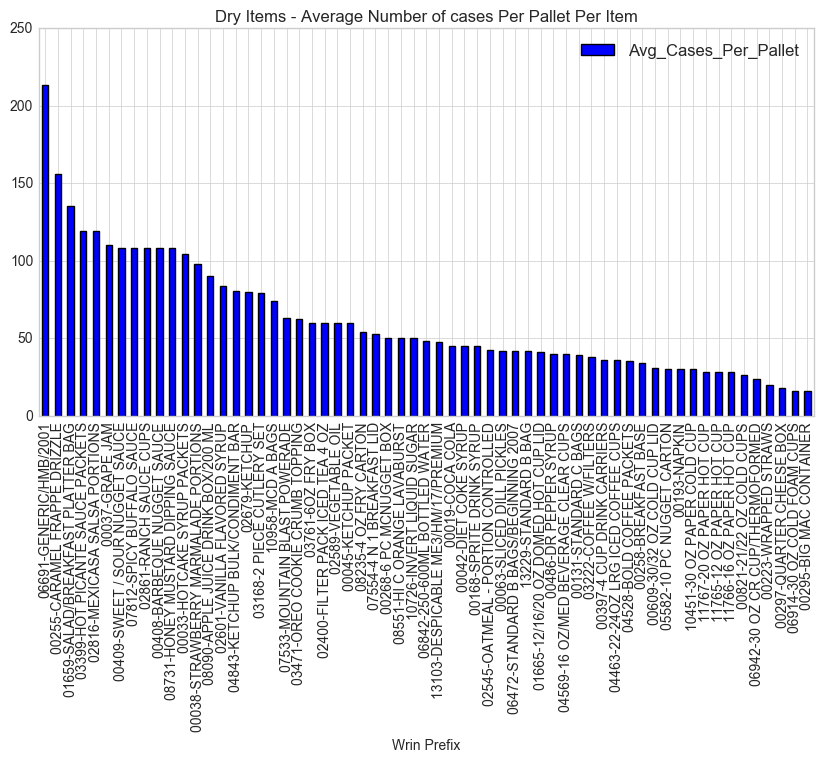

In [41]:
Cases_per_Pallet_D=Dry.groupby(['Wrin Prefix'])['Cases_per_Pallet'].mean().reset_index(name='Avg_Cases_Per_Pallet')
Cases_per_Pallet_D.set_index('Wrin Prefix',inplace=True)
Cases_per_Pallet_D.sort_values('Avg_Cases_Per_Pallet',inplace=True,ascending=False)
Cases_per_Pallet_D.plot(kind='bar',figsize=(10,5),color='b')
plt.title('Dry Items - Average Number of cases Per Pallet Per Item')
plt.show()

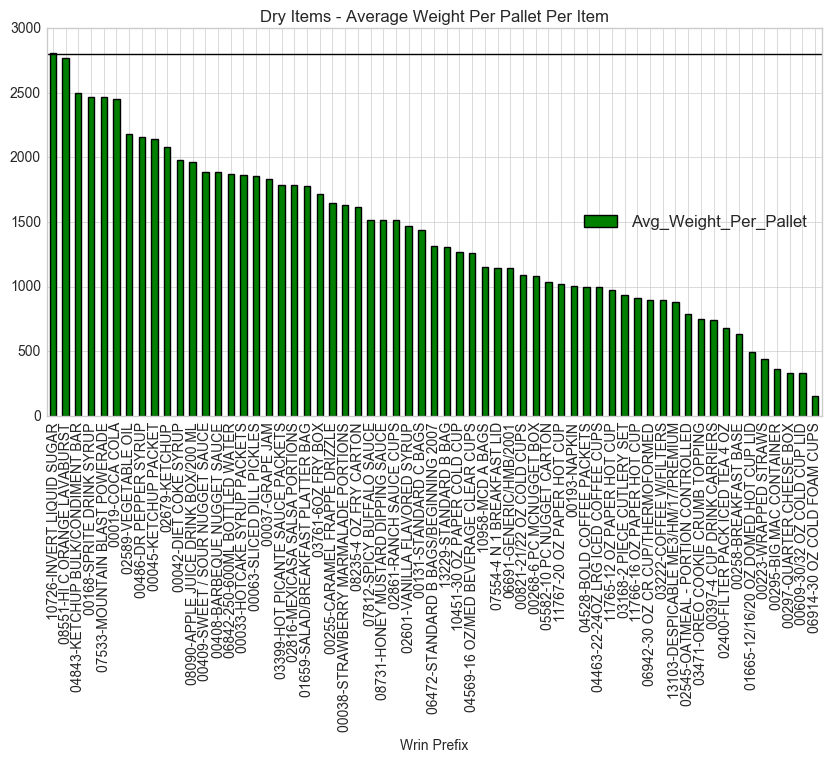

In [42]:
Weight_per_Pallet_D=Dry.groupby(['Wrin Prefix'])['Weight_per_Pallet'].mean().reset_index(name='Avg_Weight_Per_Pallet')
Weight_per_Pallet_D.set_index('Wrin Prefix',inplace=True)
Weight_per_Pallet_D.sort_values('Avg_Weight_Per_Pallet',inplace=True,ascending=False)
Weight_per_Pallet_D.plot(kind='bar',figsize=(10,5),color='g')
plt.axhline(y=2800,color='black')
plt.title('Dry Items - Average Weight Per Pallet Per Item')
plt.show()

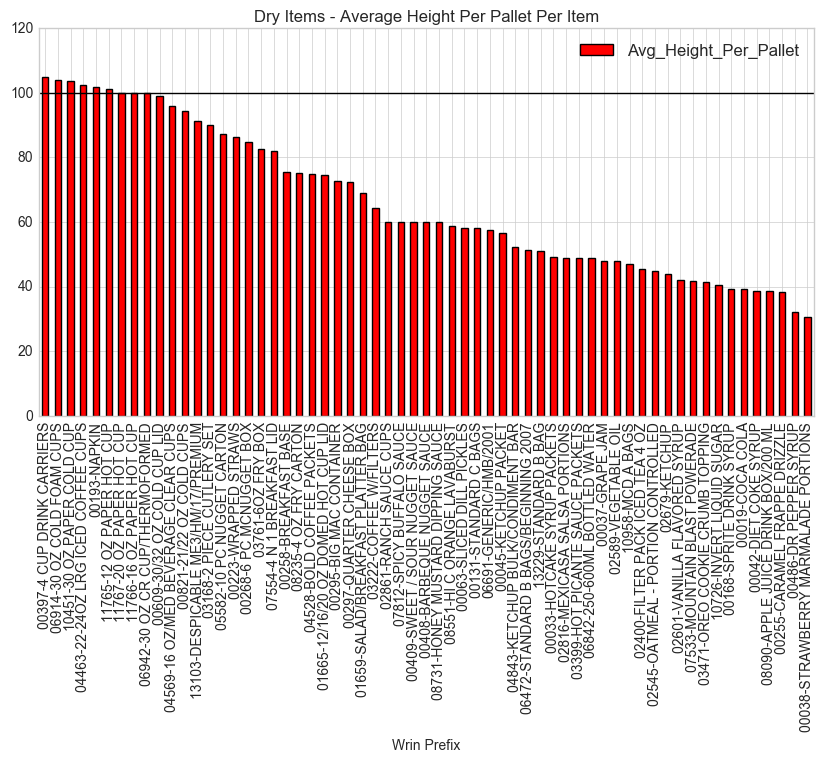

In [43]:
Height_per_Pallet_D=Dry.groupby(['Wrin Prefix'])['Height_per_Pallet'].mean().reset_index(name='Avg_Height_Per_Pallet')
Height_per_Pallet_D.set_index('Wrin Prefix',inplace=True)
Height_per_Pallet_D.sort_values('Avg_Height_Per_Pallet',inplace=True,ascending=False)
Height_per_Pallet_D.plot(kind='bar',figsize=(10,5),color='r')
plt.axhline(y=100,color='black')
plt.title('Dry Items - Average Height Per Pallet Per Item')
plt.show()

In [44]:
#Height_per_Pallet_D

In [45]:
Dry=Dry.merge(Height_per_Pallet_D,left_on='Wrin Prefix',right_index=True,how='left')
Dry['Avg_Height_Per_Pallet']=Dry['Avg_Height_Per_Pallet'].apply(lambda x: 100 if x>100 else x)
Dry.head(2)

,Supplier Parent Name,Supplier WSI#,DC Receipts Cases Received,Wrin Prefix,Wrin Description,Wrin Temp Zone,WW Case Height,WW Case Length,WW Case Width,WW Weight UOM,...,WW Gross Weight (LBS),WW Case Dimensions (inches),DC ID,case_size,Cases_per_Pallet,Layer_count,Cases_Per_Layer,Weight_per_Pallet,Height_per_Pallet,Avg_Height_Per_Pallet
29,COCA-COLA COMPANY (THE)/MCDONALDS ACCOUNT GROUP,16905,4050,00019-COCA COLA,00019002-COKE/BIB,D,7.88,15.75,11.75,LB,...,54.22,15.75 x 11.75 x 7.88,7,"(7.88, 15.75, 11.75)",45,5,9,2439.9,39.4,39.4
30,COCA-COLA COMPANY (THE)/MCDONALDS ACCOUNT GROUP,20049,8249,00019-COCA COLA,00019002-COKE/BIB,D,7.88,15.75,11.75,LB,...,55.20,15.75 x 11.75 x 7.88,15,"(7.88, 15.75, 11.75)",45,5,9,2484.0,39.4,39.4


In [46]:
#Dry['Total_Pallet_vol']=Dry.apply(lambda row: round(float(row['Avg_Height_Per_Pallet']*40*48),3),axis=1)

In [47]:
#Dry['Utilize_Pallet_vol']=Dry.apply(lambda row:round(float(row['WW Case Height'])*row['WW Case Length']*row['WW Case Width']*row['Cases_per_Pallet'],3),axis=1)
#Dry['Wasted_Vol']=Dry.apply(lambda row:float(row['Total_Pallet_vol']-row['Utilize_Pallet_vol']),axis=1)
#Dry.head()

In [48]:
#len(Dry[Dry['Wasted_Vol']<0])
#Dry.groupby(['Wrin Prefix'])['Wasted_Vol'].max()

In [49]:
#Dry[Dry['Wasted_Vol']<0]['Wrin Prefix'].unique()

In [50]:
#Dry=Dry[Dry['Wasted_Vol']>0]

In [51]:
Dry['Wastage_Height']=Dry.apply(lambda row:row['Avg_Height_Per_Pallet']-row['Height_per_Pallet'],axis=1)

In [52]:
#Dry['Utilize_length']=Dry.apply(lambda row: row['WW Case Length']*row['Cases_Per_Layer'],axis=1)

In [53]:
Dry.shape

(424, 22)

## Calculate Utilize_length, Utilize_width,position, wastage Area

In [54]:

for index,row in Dry.iterrows():
    Area_Pallet=float(40*48)
    Case_length=row['WW Case Length']
    Case_width=row['WW Case Width']
    Case_height=row['WW Case Height']

    # Length-Width Wise Arrangment
    No_cols=math.floor(48/Case_length)
    No_rows=math.floor(40/Case_width)
    
    # Length-Height Wise Arrangment
    No_cols1=math.floor(48/Case_length)
    No_rows1=math.floor(40/Case_height)
    
    # Width-length Wise Arrangment
    No_Cols=math.floor(48/Case_width)
    No_Rows=math.floor(40/Case_length)
    
    # Width- Height Arrangment
    No_Cols1=math.floor(48/Case_width)
    No_Rows1=math.floor(40/Case_height)
    
    # Height-length Wise Arrangment
    NoCols=math.floor(48/Case_height)
    NoRows=math.floor(40/Case_length)
    
    # Height- Height Arrangment
    NoCols1=math.floor(48/Case_height)
    NoRows1=math.floor(40/Case_width)
     
    if ((No_cols*No_rows)==row['Cases_Per_Layer'])&((No_cols*Case_length)<=48)&((No_rows*Case_width)<=40):
        Dry.set_value(index, 'Utilize_length',No_cols*Case_length)
        Dry.set_value(index, 'Utilize_width', No_rows*Case_width)
        Dry.set_value(index, 'Position', 'L-W') 
        Dry.set_value(index, 'Wastage_Area', Area_Pallet-(No_cols*Case_length* No_rows*Case_width))
        Dry.set_value(index, 'Cols_layer',No_cols)
        Dry.set_value(index, 'Rows_layer', No_rows)
        
    elif (No_cols1*No_rows1)==row['Cases_Per_Layer']&((No_cols1*Case_length)<=48)&((No_rows1*Case_height)<=40):
        Dry.set_value(index, 'Utilize_length',No_cols1*Case_length)
        Dry.set_value(index, 'Utilize_width', No_rows1*Case_height)
        Dry.set_value(index, 'Position', 'L-H')
        Dry.set_value(index, 'Wastage_Area', Area_Pallet-(No_cols1*Case_length*No_rows1*Case_height))
        Dry.set_value(index, 'Cols_layer',No_cols1)
        Dry.set_value(index, 'Rows_layer', No_rows1)
        
    elif (No_Cols*No_Rows)==row['Cases_Per_Layer']&((No_Cols*Case_width)<=48)&((No_Rows*Case_length)<=40):
        Dry.set_value(index, 'Utilize_length',No_Cols*Case_width)
        Dry.set_value(index, 'Utilize_width', No_Rows*Case_length)
        Dry.set_value(index, 'Position', 'W-L')
        Dry.set_value(index, 'Wastage_Area', Area_Pallet-(No_Cols*Case_width*No_Rows*Case_length))
        Dry.set_value(index, 'Cols_layer',No_Cols)
        Dry.set_value(index, 'Rows_layer', No_Rows)
        
    elif (No_Cols1*No_Rows1)==row['Cases_Per_Layer']&((No_Cols1*Case_width)<=48)&((No_Rows1*Case_height)<=40):
        Dry.set_value(index, 'Utilize_length',No_Cols1*Case_width)
        Dry.set_value(index, 'Utilize_width', No_Rows1*Case_height)
        Dry.set_value(index, 'Position', 'W-H')
        Dry.set_value(index, 'Wastage_Area', Area_Pallet-(No_Cols1*Case_width*No_Rows1*Case_height))
        Dry.set_value(index, 'Cols_layer',No_Cols1)
        Dry.set_value(index, 'Rows_layer', No_Rows1)
    
    
    elif (NoCols*NoRows)==row['Cases_Per_Layer']&((NoCols*Case_height)<=48)&((NoRows*Case_length)<=40):
        Dry.set_value(index, 'Utilize_length',NoCols*Case_height)
        Dry.set_value(index, 'Utilize_width', NoRows*Case_length)
        Dry.set_value(index, 'Position', 'H-L')
        Dry.set_value(index, 'Wastage_Area', Area_Pallet-(NoCols*Case_height*NoRows*Case_length))
        Dry.set_value(index, 'Cols_layer',NoCols)
        Dry.set_value(index, 'Rows_layer', NoRows)
        
    elif (NoCols1*NoRows1)==row['Cases_Per_Layer']&((No_Cols1*Case_height)<=48)&((No_Rows1*Case_width)<=40):
        Dry.set_value(index, 'Utilize_length',No_Cols1*Case_height)
        Dry.set_value(index, 'Utilize_width', No_Rows1*Case_width) 
        Dry.set_value(index, 'Position', 'H-W')
        Dry.set_value(index, 'Wastage_Area', Area_Pallet-(No_Cols1*Case_height*No_Rows1*Case_width))
        Dry.set_value(index, 'Cols_layer',NoCols1)
        Dry.set_value(index, 'Rows_layer', NoRows1)
    else:
        Dry.set_value(index, 'Utilize_length', 999)
        Dry.set_value(index, 'Utilize_width', 999)

In [55]:
len(Dry[Dry['Utilize_length']!=999])

116

In [56]:
set(Dry[Dry['Utilize_length']==999]['Wrin Prefix'])

{'00033-HOTCAKE SYRUP PACKETS',
 '00037-GRAPE JAM',
 '00038-STRAWBERRY MARMALADE PORTIONS',
 '00045-KETCHUP PACKET',
 '00063-SLICED DILL PICKLES',
 '00131-STANDARD C BAGS',
 '00193-NAPKIN',
 '00223-WRAPPED STRAWS',
 '00255-CARAMEL FRAPPE DRIZZLE',
 '00258-BREAKFAST BASE',
 '00268-6 PC MCNUGGET BOX',
 '00295-BIG MAC CONTAINER',
 '00297-QUARTER CHEESE BOX',
 '00397-4 CUP DRINK CARRIERS',
 '00408-BARBEQUE NUGGET SAUCE',
 '00409-SWEET / SOUR NUGGET SAUCE',
 '00486-DR PEPPER SYRUP',
 '00609-30/32 OZ COLD CUP LID',
 '00821-21/22 OZ COLD CUPS',
 '01659-SALAD/BREAKFAST PLATTER BAG',
 '01665-12/16/20 OZ DOMED HOT CUP LID',
 '02400-FILTER PACK ICED TEA 4 OZ',
 '02545-OATMEAL - PORTION CONTROLLED',
 '02589-VEGETABLE OIL',
 '02601-VANILLA FLAVORED SYRUP',
 '02679-KETCHUP',
 '02816-MEXICASA SALSA PORTIONS',
 '02861-RANCH SAUCE CUPS',
 '03168-2 PIECE CUTLERY SET',
 '03222-COFFEE W/FILTERS',
 '03399-HOT PICANTE SAUCE PACKETS',
 '03471-OREO COOKIE CRUMB TOPPING',
 '03761-6OZ FRY BOX',
 '04463-22-24OZ 

In [57]:
# for now remove above cases
Dry=Dry[Dry['Utilize_length']!=999]

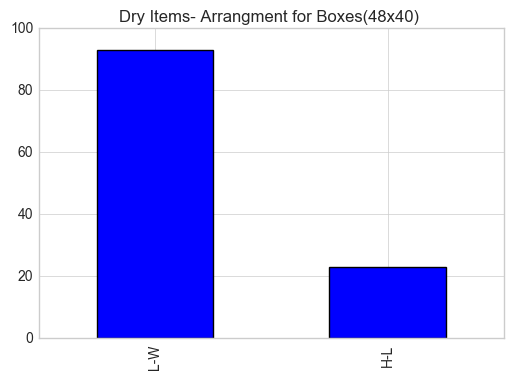

In [58]:
Dry['Position'].value_counts().plot(kind='bar')
plt.title("Dry Items- Arrangment for Boxes(48x40) ")
plt.show()

In [59]:
Dry.columns

Index(['Supplier Parent Name', 'Supplier WSI#', 'DC Receipts Cases Received',
       'Wrin Prefix', 'Wrin Description', 'Wrin Temp Zone', 'WW Case Height',
       'WW Case Length', 'WW Case Width', 'WW Weight UOM', 'WW Pallet TI x HI',
       'WW Gross Weight (LBS)', 'WW Case Dimensions (inches)', 'DC ID',
       'case_size', 'Cases_per_Pallet', 'Layer_count', 'Cases_Per_Layer',
       'Weight_per_Pallet', 'Height_per_Pallet', 'Avg_Height_Per_Pallet',
       'Wastage_Height', 'Utilize_length', 'Utilize_width', 'Position',
       'Wastage_Area', 'Cols_layer', 'Rows_layer'],
      dtype='object')

In [60]:
Dry.groupby(['Wrin Prefix'])['Wastage_Area'].min()

Wrin Prefix
00019-COCA COLA                          254.4375
00042-DIET COKE SYRUP                    325.3125
00168-SPRITE DRINK SYRUP                 254.4375
00223-WRAPPED STRAWS                      10.5456
00268-6 PC MCNUGGET BOX                    0.0000
00297-QUARTER CHEESE BOX                   0.0000
00609-30/32 OZ COLD CUP LID              976.4424
00821-21/22 OZ COLD CUPS                1396.6203
01665-12/16/20 OZ DOMED HOT CUP LID      525.6168
02545-OATMEAL - PORTION CONTROLLED        95.5668
03168-2 PIECE CUTLERY SET                 31.2000
04843-KETCHUP BULK/CONDIMENT BAR         141.3750
06472-STANDARD B BAGS/BEGINNING 2007     228.0000
06691-GENERIC/HMB/2001                   177.0000
06914-30 OZ COLD FOAM CUPS                60.7944
07533-MOUNTAIN BLAST POWERADE            306.8850
10958-MCD A BAGS                         204.0000
11765-12 OZ PAPER HOT CUP               1401.7123
11766-16 OZ PAPER HOT CUP               1406.8398
11767-20 OZ PAPER HOT CUP             

In [61]:
#sort and keep case with min wastage area
Dry.sort_values(['Wrin Prefix','Wastage_Area'],inplace=True)
Dry.drop_duplicates('Wrin Prefix',keep='first',inplace=True)

In [62]:
temp=Dry.loc[:,['Wrin Prefix','Position','Wastage_Area']]
pd.pivot_table(temp, index=['Wrin Prefix'], columns=['Position'], values=['Wastage_Area']).fillna(0)

Wastage_Area          
Position                                      H-L       L-W
Wrin Prefix                                                
00019-COCA COLA                            0.0000  254.4375
00042-DIET COKE SYRUP                      0.0000  325.3125
00168-SPRITE DRINK SYRUP                   0.0000  254.4375
00223-WRAPPED STRAWS                       0.0000   10.5456
00268-6 PC MCNUGGET BOX                    0.0000    0.0000
00297-QUARTER CHEESE BOX                   0.0000    0.0000
00609-30/32 OZ COLD CUP LID                0.0000  976.4424
00821-21/22 OZ COLD CUPS                1396.6203    0.0000
01665-12/16/20 OZ DOMED HOT CUP LID        0.0000  525.6168
02545-OATMEAL - PORTION CONTROLLED         0.0000   95.5668
03168-2 PIECE CUTLERY SET                  0.0000   31.2000
04843-KETCHUP BULK/CONDIMENT BAR           0.0000  141.3750
06472-STANDARD B BAGS/BEGINNING 2007       0.0000  228.0000
06691-GENERIC/HMB/2001                     0.0000  177.0000
06914-30 OZ COLD FOAM CUPS                 0.0000   60.7944
07533-MOUNTAIN BLAST POWERADE              0.0000  306.8850
10958-MCD A BAGS                           0.0000  204.0000
11765-12 OZ PAPER HOT CUP               1401.7123    0.0000
11766-16 OZ PAPER HOT CUP               1406.8398    0.0000
11767-20 OZ PAPER HOT CUP               1406.8398    0.0000
13229-STANDARD B BAG                       0.0000  228.0000

In [63]:
# Proper Dimensional data

In [64]:
Dry['Wastage_Length']=Dry.apply(lambda row: ((48-row['Utilize_length'])/row['Cols_layer']) ,axis=1)
Dry['Wastage_Width']=Dry.apply(lambda row: ((40-row['Utilize_width'])/row['Rows_layer']),axis=1)

In [67]:

np.arange(0.25,0.01,-0.01)

array([ 0.25,  0.24,  0.23,  0.22,  0.21,  0.2 ,  0.19,  0.18,  0.17,
        0.16,  0.15,  0.14,  0.13,  0.12,  0.11,  0.1 ,  0.09,  0.08,
        0.07,  0.06,  0.05,  0.04,  0.03,  0.02])

In [68]:
Dry[Dry['Position']=='H-L']

,Supplier Parent Name,Supplier WSI#,DC Receipts Cases Received,Wrin Prefix,Wrin Description,Wrin Temp Zone,WW Case Height,WW Case Length,WW Case Width,WW Weight UOM,...,Avg_Height_Per_Pallet,Wastage_Height,Utilize_length,Utilize_width,Position,Wastage_Area,Cols_layer,Rows_layer,Wastage_Length,Wastage_Width
180,PACTIV LLC,39241,5332,00821-21/22 OZ COLD CUPS,00821441-COLD CUP/21 OZ/DYNAMIC,D,24.13,21.69,14.63,LB,...,94.256,-2.264,24.13,21.69,H-L,1396.6203,1.0,1.0,23.87,18.31
576,PACTIV LLC,39241,8623,11765-12 OZ PAPER HOT CUP,11765003-HOT CUP/12 OZ/DW/PPR,D,25.27,20.51,13.51,LB,...,100.000,-1.080,25.27,20.51,H-L,1401.7123,1.0,1.0,22.73,19.49
582,PACTIV LLC,39241,8232,11766-16 OZ PAPER HOT CUP,11766003-HOT CUP/16 OZ/DW/PPR,D,25.02,20.51,13.51,LB,...,100.000,-0.080,25.02,20.51,H-L,1406.8398,1.0,1.0,22.98,19.49
588,INTERNATIONAL PAPER,16141,727,11767-20 OZ PAPER HOT CUP,11767003-HOT CUP/20 OZ/DW/PPR,D,25.02,20.51,13.51,LB,...,100.000,-0.080,25.02,20.51,H-L,1406.8398,1.0,1.0,22.98,19.49


In [69]:
import timeit

start = timeit.default_timer()
for idx,row in Dry.iterrows():
    if row['Position']=='L-W':
        #Old Area
        Total_Area_Old=row['WW Case Length']*row['WW Case Width']
        #New Area
        Max_length_case=row['Wastage_Length']
        Max_width_case=row['Wastage_Width']
        Total_Area_New=(Max_length_case+row['WW Case Length'])*(Max_width_case+row['WW Case Width'])

        # Change in percentage
        Chnage_area_pct=round(((Total_Area_New-Total_Area_Old)/Total_Area_Old)*100,3)
        threshold=10.000
        if Chnage_area_pct<threshold:
            Dry.set_value(idx, 'Case_Length_New', Max_length_case+row['WW Case Length'])
            Dry.set_value(idx, 'Case_Width_New', Max_width_case+row['WW Case Width'])
            Dry.set_value(idx, 'Chnage_Size(%)', Chnage_area_pct)
        else:
            length=np.arange(Max_length_case,0.01,-0.01)
            width=np.arange(Max_width_case,0.01,-0.01)
            Chnage_area_pct=0.000
            for i in length:

                for j in width:
                    #print("width: ",j)
                    Total_Area_New=((i+row['WW Case Length'])*(j+row['WW Case Width']))
                    Chnage_area_pct=round(((Total_Area_New-Total_Area_Old)/Total_Area_Old)*100,3)
                    #print(Total_Area_New,Chnage_area_pct)
                    if (Chnage_area_pct<=threshold):
                        Dry.set_value(idx, 'Case_Length_New',i+row['WW Case Length'])
                        Dry.set_value(idx, 'Case_Width_New', j+row['WW Case Width'])
                        Dry.set_value(idx, 'Chnage_Size(%)', Chnage_area_pct)
                        break
                    else:
                        continue
    ## Work In Progress Snehal
    elif row['Position']=='H-L':
         #Old Area
        Total_Area_Old=row['WW Case Height']*row['WW Case Length']
        #New Area
        Max_Height_case=row['Wastage_Length']
        #print(Max_Height_case)
        Max_length_case=row['Wastage_Width']
        Total_Area_New=(Max_length_case+row['WW Case Length'])*(Max_Height_case+row['WW Case Height'])

        # Change in percentage
        Chnage_area_pct=round(((Total_Area_New-Total_Area_Old)/Total_Area_Old)*100,3)
        threshold=10.000
        if Chnage_area_pct<threshold:
            Dry.set_value(idx, 'Case_Length_New', Max_length_case+row['WW Case Length'])
            Dry.set_value(idx, 'Case_Height_New', Max_Height_case+row['WW Case Height'])
            Dry.set_value(idx, 'Chnage_Size(%)', Chnage_area_pct)
        else:
            length=np.arange(Max_length_case,0.01,-0.01)
            height=np.arange(Max_Height_case,0.01,-0.01)
            Chnage_area_pct=0.000
            for i in length:
                for j in height:
                    Total_Area_New=((i+row['WW Case Length'])*(j+row['WW Case Height']))
                    Chnage_area_pct=round(((Total_Area_New-Total_Area_Old)/Total_Area_Old)*100,3)
                    if (Chnage_area_pct<=threshold):
                        Dry.set_value(idx, 'Case_Length_New',i+row['WW Case Length'])
                        Dry.set_value(idx, 'Case_Height_New', j+row['WW Case Height'])
                        Dry.set_value(idx, 'Chnage_Size(%)', Chnage_area_pct)
                        break
                    else:
                        continue
                    
stop = timeit.default_timer()

print (stop - start )                  

470.0707040578685


In [70]:
Dry.columns

Index(['Supplier Parent Name', 'Supplier WSI#', 'DC Receipts Cases Received',
       'Wrin Prefix', 'Wrin Description', 'Wrin Temp Zone', 'WW Case Height',
       'WW Case Length', 'WW Case Width', 'WW Weight UOM', 'WW Pallet TI x HI',
       'WW Gross Weight (LBS)', 'WW Case Dimensions (inches)', 'DC ID',
       'case_size', 'Cases_per_Pallet', 'Layer_count', 'Cases_Per_Layer',
       'Weight_per_Pallet', 'Height_per_Pallet', 'Avg_Height_Per_Pallet',
       'Wastage_Height', 'Utilize_length', 'Utilize_width', 'Position',
       'Wastage_Area', 'Cols_layer', 'Rows_layer', 'Wastage_Length',
       'Wastage_Width', 'Case_Length_New', 'Case_Width_New', 'Chnage_Size(%)',
       'Case_Height_New'],
      dtype='object')

In [71]:
Dry_Final=Dry.loc[:,['Wrin Prefix','Position','Cols_layer','Rows_layer','Wastage_Area','WW Case Length','Case_Length_New','WW Case Width','Case_Width_New','WW Case Height','Case_Height_New','Chnage_Size(%)']]

In [72]:
Dry_Final

,Wrin Prefix,Position,Cols_layer,Rows_layer,Wastage_Area,WW Case Length,Case_Length_New,WW Case Width,Case_Width_New,WW Case Height,Case_Height_New,Chnage_Size(%)
29,00019-COCA COLA,L-W,3.0,3.0,254.4375,15.75,15.77,11.75,12.903333,7.88,NaN,9.955
51,00042-DIET COKE SYRUP,L-W,3.0,3.0,325.3125,15.75,15.77,11.25,12.353333,7.75,NaN,9.947
83,00168-SPRITE DRINK SYRUP,L-W,3.0,3.0,254.4375,15.75,15.77,11.75,12.903333,7.88,NaN,9.955
91,00223-WRAPPED STRAWS,L-W,2.0,2.0,10.5456,23.94,24.00,19.94,20.000000,17.75,NaN,0.552
116,00268-6 PC MCNUGGET BOX,L-W,2.0,5.0,0.0000,24.00,24.00,8.00,8.000000,17.13,NaN,0.000
128,00297-QUARTER CHEESE BOX,L-W,2.0,2.0,0.0000,24.00,24.00,20.00,20.000000,16.13,NaN,0.000
171,00609-30/32 OZ COLD CUP LID,L-W,2.0,2.0,976.4424,17.63,17.64,13.38,14.700000,26.25,NaN,9.928
180,00821-21/22 OZ COLD CUPS,H-L,1.0,1.0,1396.6203,21.69,21.71,14.63,NaN,24.13,26.51,9.965
212,01665-12/16/20 OZ DOMED HOT CUP LID,L-W,2.0,3.0,525.6168,19.88,19.89,11.69,12.843333,15.63,NaN,9.921
241,02545-OATMEAL - PORTION CONTROLLED,L-W,3.0,4.0,95.5668,15.69,16.00,9.69,10.000000,11.88,NaN,5.238


## Freezer Items

In [73]:
Freezer=Inbound_data[Inbound_data['Wrin Prefix'].isin(list(To15_FreezerItems['Wrin Prefix']))]
Freezer.shape

(56, 20)

In [74]:
Freezer.head(2)

,Supplier Parent Name,Supplier WSI#,DC Receipts Cases Received,Wrin Prefix,Wrin Description,Wrin Temp Zone,WW Case Height,WW Case Length,WW Case Width,WW Weight UOM,WW Pallet TI x HI,WW Gross Weight (LBS),WW Case Dimensions (inches),DC ID,case_size,Cases_per_Pallet,Layer_count,Cases_Per_Layer,Weight_per_Pallet,Height_per_Pallet
0,MCCAIN FOODS,47883,728707,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,F,13.50,16.38,13.13,LB,9.00 x 6.00,38.0,16.38 x 13.13 x 13.50,7,"(13.5, 16.38, 13.13)",54,6,9,2052.0,81.00
1,J R SIMPLOT COMPANY,17540,202308,00004-FRENCH FRIES,00004849-FRIES/440 NATURAL F16/6,F,12.38,16.00,13.00,LB,9.00 x 8.00,38.0,16.00 x 13.00 x 12.38,15,"(12.38, 16.0, 13.0)",72,8,9,2736.0,99.04


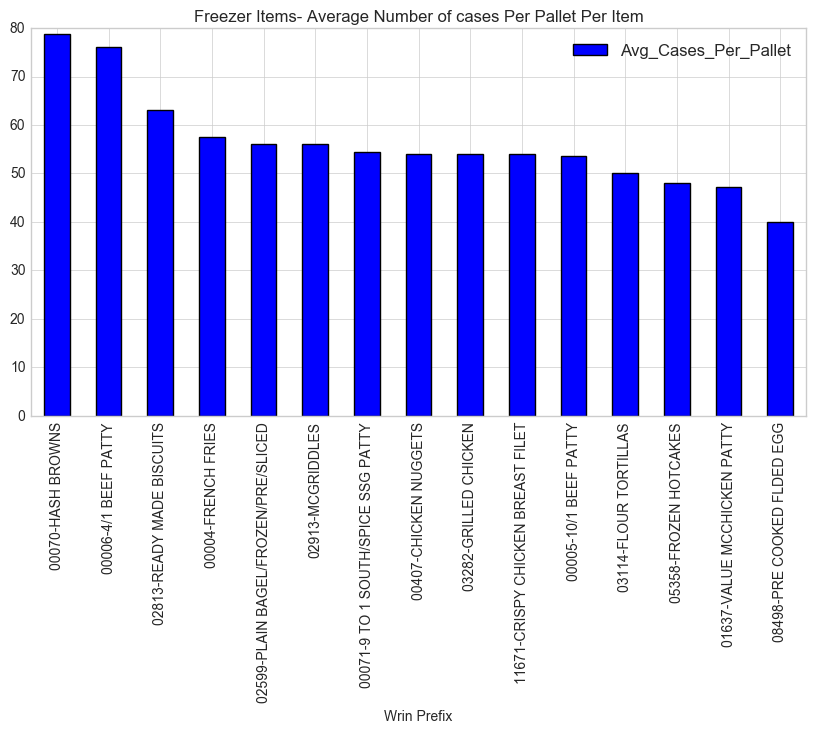

In [75]:
Cases_per_Pallet_F=Freezer.groupby(['Wrin Prefix'])['Cases_per_Pallet'].mean().reset_index(name='Avg_Cases_Per_Pallet')
Cases_per_Pallet_F.set_index('Wrin Prefix',inplace=True)
Cases_per_Pallet_F.sort_values('Avg_Cases_Per_Pallet',inplace=True,ascending=False)
Cases_per_Pallet_F.plot(kind='bar',figsize=(10,5),color='b')
plt.title('Freezer Items- Average Number of cases Per Pallet Per Item')
plt.show()

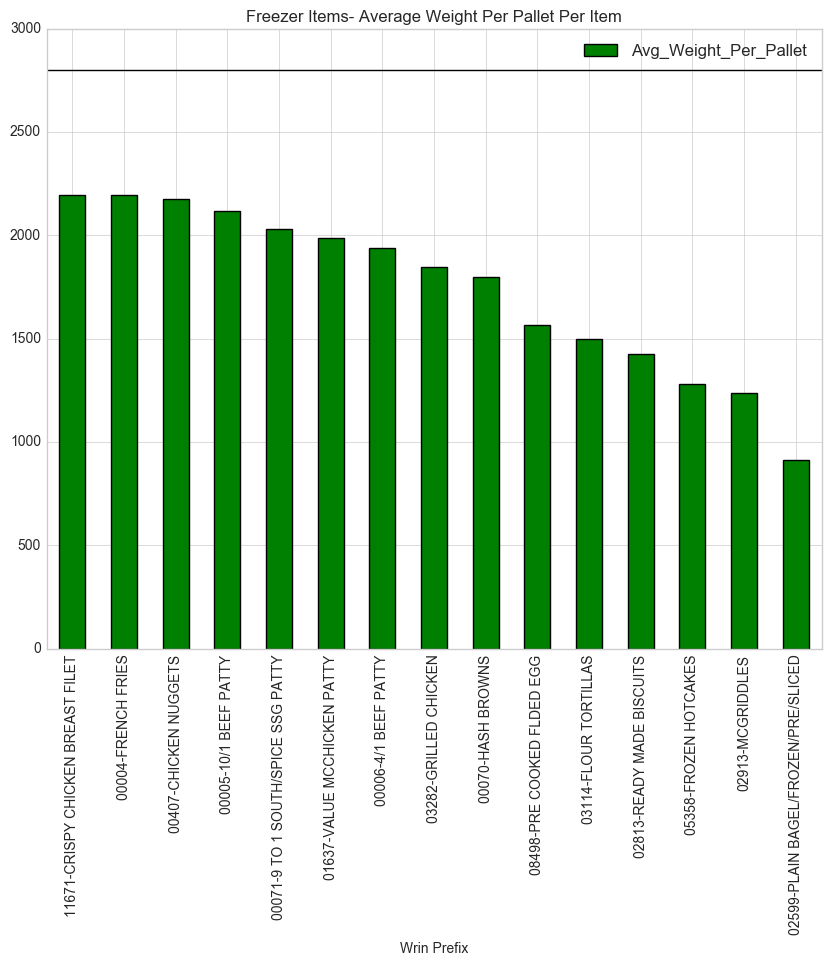

In [76]:
Weight_per_Pallet_F=Freezer.groupby(['Wrin Prefix'])['Weight_per_Pallet'].mean().reset_index(name='Avg_Weight_Per_Pallet')
Weight_per_Pallet_F.set_index('Wrin Prefix',inplace=True)
Weight_per_Pallet_F.sort_values('Avg_Weight_Per_Pallet',inplace=True,ascending=False)
Weight_per_Pallet_F.plot(kind='bar',figsize=(10,8),color='g')
plt.axhline(y=2800,color='black')
plt.title('Freezer Items- Average Weight Per Pallet Per Item')
plt.show()

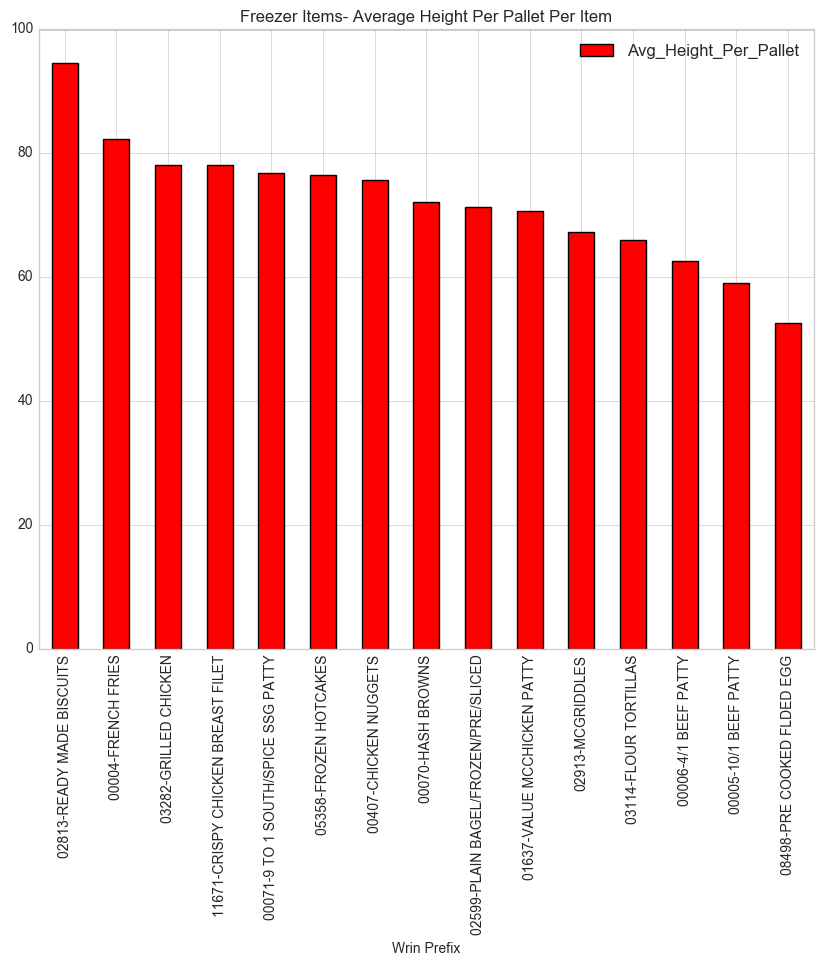

In [77]:
Height_per_Pallet_F=Freezer.groupby(['Wrin Prefix'])['Height_per_Pallet'].mean().reset_index(name='Avg_Height_Per_Pallet')
Height_per_Pallet_F.set_index('Wrin Prefix',inplace=True)
Height_per_Pallet_F.sort_values('Avg_Height_Per_Pallet',inplace=True,ascending=False)
Height_per_Pallet_F.plot(kind='bar',figsize=(10,8),color='r')
plt.axhline(y=100,color='black')
plt.title('Freezer Items- Average Height Per Pallet Per Item')
plt.show()

## Refrigerated Items

In [78]:
Refrigerated=Inbound_data[Inbound_data['Wrin Prefix'].isin(list(To15_Refrigerated['Wrin Prefix']))]
Refrigerated.shape

(59, 20)

In [79]:
Refrigerated.head(2)

,Supplier Parent Name,Supplier WSI#,DC Receipts Cases Received,Wrin Prefix,Wrin Description,Wrin Temp Zone,WW Case Height,WW Case Length,WW Case Width,WW Weight UOM,WW Pallet TI x HI,WW Gross Weight (LBS),WW Case Dimensions (inches),DC ID,case_size,Cases_per_Pallet,Layer_count,Cases_Per_Layer,Weight_per_Pallet,Height_per_Pallet
16,SCHREIBER FOODS INC,42163,93112,00013-CHEESE SLICES,00013285-CHEESE/AMERICAN/SLICES,R,8.38,13.69,12.56,LB,11.00 x 5.00,41.45,13.69 x 12.56 x 8.38,7,"(8.38, 13.69, 12.56)",55,5,11,2279.75,41.9
17,SCHREIBER FOODS INC,17410,111703,00013-CHEESE SLICES,00013285-CHEESE/AMERICAN/SLICES,R,8.38,13.69,12.56,LB,11.00 x 5.00,41.45,13.69 x 12.56 x 8.38,15,"(8.38, 13.69, 12.56)",55,5,11,2279.75,41.9


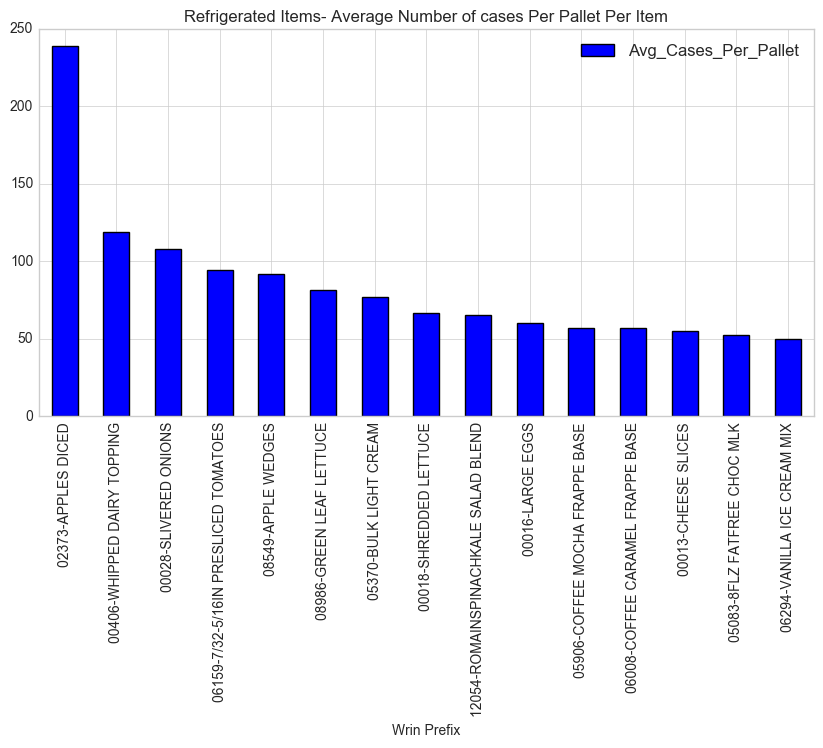

In [80]:
Cases_per_Pallet_R=Refrigerated.groupby(['Wrin Prefix'])['Cases_per_Pallet'].mean().reset_index(name='Avg_Cases_Per_Pallet')
Cases_per_Pallet_R.set_index('Wrin Prefix',inplace=True)
Cases_per_Pallet_R.sort_values('Avg_Cases_Per_Pallet',inplace=True,ascending=False)
Cases_per_Pallet_R.plot(kind='bar',figsize=(10,5),color='b')
plt.title('Refrigerated Items- Average Number of cases Per Pallet Per Item')
plt.show()

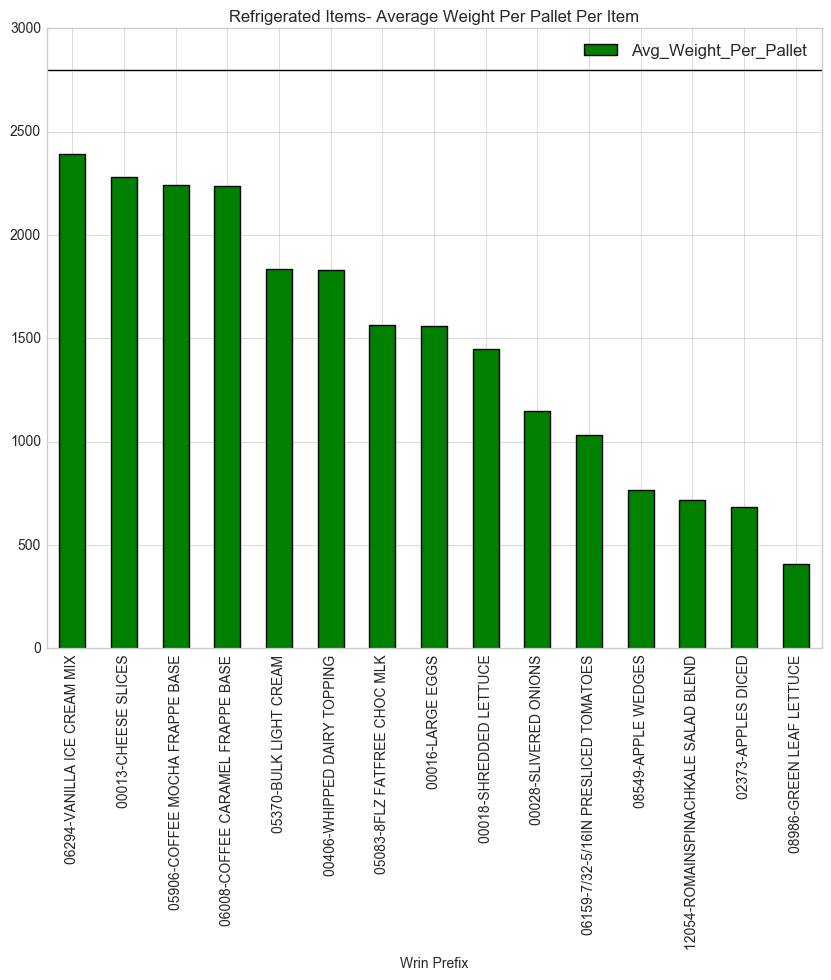

In [81]:
Weight_per_Pallet_R=Refrigerated.groupby(['Wrin Prefix'])['Weight_per_Pallet'].mean().reset_index(name='Avg_Weight_Per_Pallet')
Weight_per_Pallet_R.set_index('Wrin Prefix',inplace=True)
Weight_per_Pallet_R.sort_values('Avg_Weight_Per_Pallet',inplace=True,ascending=False)
Weight_per_Pallet_R.plot(kind='bar',figsize=(10,8),color='g')
plt.axhline(y=2800,color='black')
plt.title('Refrigerated Items- Average Weight Per Pallet Per Item')
plt.show()

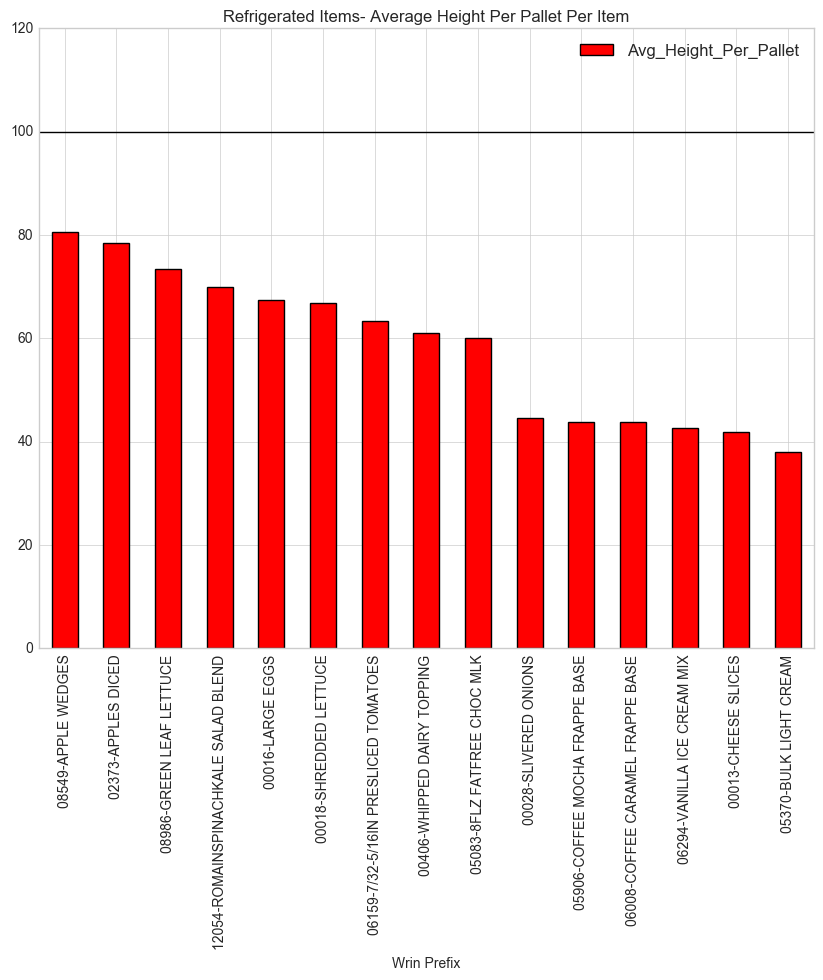

In [82]:
Height_per_Pallet_R=Refrigerated.groupby(['Wrin Prefix'])['Height_per_Pallet'].mean().reset_index(name='Avg_Height_Per_Pallet')
Height_per_Pallet_R.set_index('Wrin Prefix',inplace=True)
Height_per_Pallet_R.sort_values('Avg_Height_Per_Pallet',inplace=True,ascending=False)
Height_per_Pallet_R.plot(kind='bar',figsize=(10,8),color='r')
plt.axhline(y=100,color='black')
plt.title('Refrigerated Items- Average Height Per Pallet Per Item')
plt.show()